About Dataset
Context

A time series dataset depicting the total number of female births recording in California, USA during the year of 1959.

Content
This is a very basic time series dataset, with only the date ("dd/mm/yyyy" format), and the number of births. There are 365 records in total.

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/daily-total-female-births-in-cal.csv")
data.head()

,Date,"Daily total female births in California, 1959"
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Annomaly detection

In [ ]:
# data['Date'] = pd.to_datetime(data['Date'])
# data.head()

In [ ]:
# So above we need to convert the data by detecting the annomalies
data=data[0:364]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Date                                           364 non-null    object
 1   Daily total female births in California, 1959  364 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,"Daily total female births in California, 1959"
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Date                                           364 non-null    datetime64[ns]
 1   Daily total female births in California, 1959  364 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


Convert the "Date" column to datetime and set it as the index

In [ ]:
data.set_index('Date', inplace=True)

Decompose time series

In [ ]:
# Import necessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

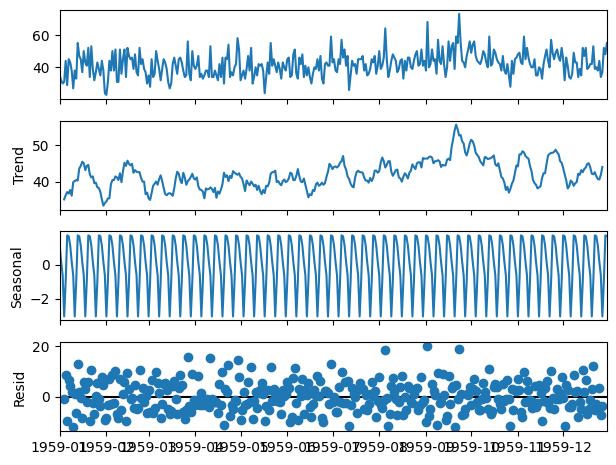

In [ ]:
# Perform seasonal decomposition
decompose_result = seasonal_decompose(data, model='additive')  # Replace 'Column_Name' with the column name

# Plot the decomposed components
decompose_result.plot()
plt.show()

# More decomposition using moving averagre to check trend and seasonality in the data

<Axes: xlabel='Date'>

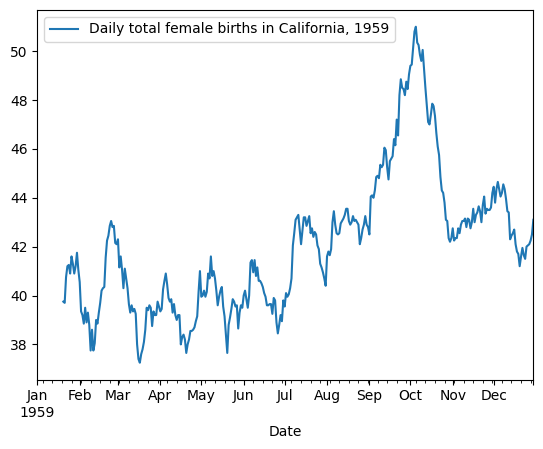

In [ ]:
data_mean=data.rolling(window=20).mean()
data_mean.plot()

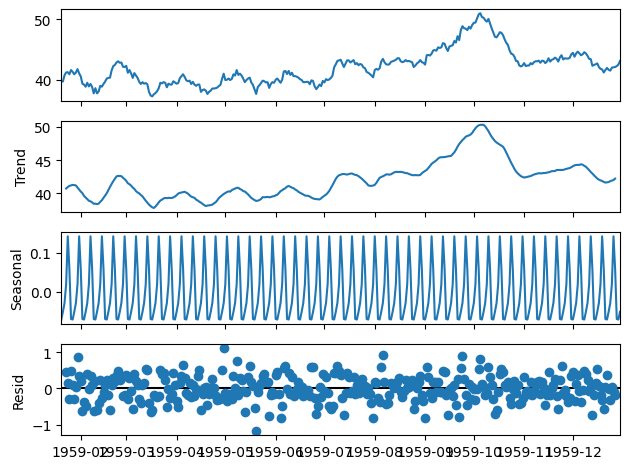

In [ ]:
# Now decomposing the data_mean
a=data_mean.dropna()
# Perform seasonal decomposition
decompose_result = seasonal_decompose(a, model='additive')  # Replace 'Column_Name' with the column name

# Plot the decomposed components
decompose_result.plot()
plt.show()

# Check Stationarity in the data

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(data)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# Interpretation:
# - If p-value > 0.05, the series is not stationary.
# - Differencing might be needed if the series is non-stationary.


ADF Statistic: -4.831115135904673
p-value: 4.7402410527624215e-05
Critical Values: {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}


As we can see that the series is Stationary

##Model Building

ploting PACF and ACF plot for ARIMA model

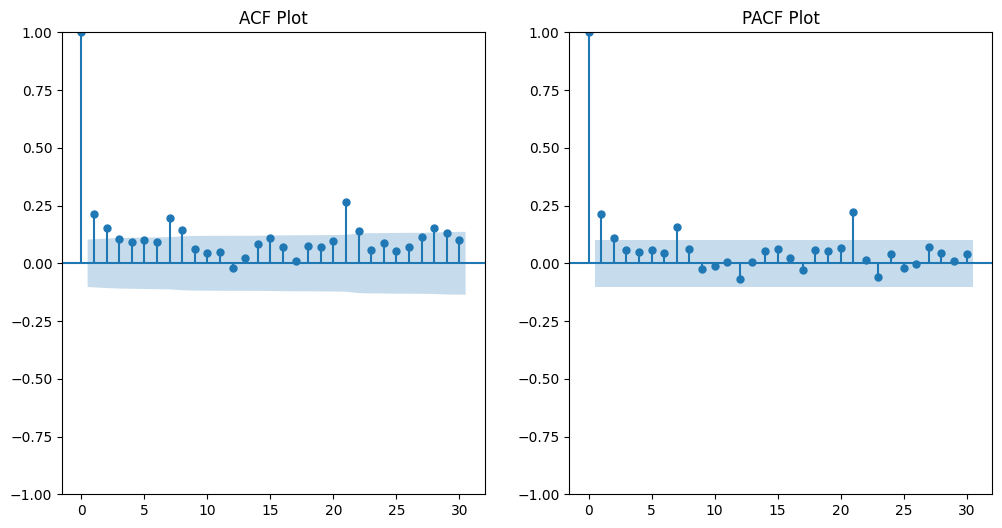

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to identify lags
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data, ax=plt.gca(), lags=30)
plt.title("ACF Plot")

plt.subplot(122)
plot_pacf(data, ax=plt.gca(), lags=30)
plt.title("PACF Plot")

plt.show()

ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Define ARIMA model (p=1, d=0, q=1)
arima_order = (2, 0, 1)
arima_model = ARIMA(data[0:352], order=arima_order)
arima_result = arima_model.fit()

# Summary of the model
print(arima_result.summary())

# Forecast next 12 outcomes
arima_forecast = arima_result.forecast(steps=12)
print("ARIMA Forecast:", arima_forecast)

from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(data[352:], arima_forecast)
print("RMSE:", rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                             SARIMAX Results                                             
Dep. Variable:     Daily total female births in California, 1959   No. Observations:                  352
Model:                                            ARIMA(2, 0, 1)   Log Likelihood               -1185.190
Date:                                           Mon, 23 Dec 2024   AIC                           2380.380
Time:                                                   14:29:51   BIC                           2399.699
Sample:                                               01-01-1959   HQIC                          2388.068
                                                    - 12-18-1959                                         
Covariance Type:                                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

Ar model

In [ ]:
# Define ARIMA model (p=1, d=0, q=1)
arima_order = (2, 0, 0)
AR_model = ARIMA(data[0:352], order=arima_order)
AR_result = AR_model.fit()

# Summary of the model
print(AR_result.summary())

# Forecast next 12 outcomes
AR_forecast = AR_result.forecast(steps=12)
print("AR Forecast:", AR_forecast)


from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(data[352:], AR_forecast)
print("RMSE:", rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                             SARIMAX Results                                             
Dep. Variable:     Daily total female births in California, 1959   No. Observations:                  352
Model:                                            ARIMA(2, 0, 0)   Log Likelihood               -1191.254
Date:                                           Mon, 23 Dec 2024   AIC                           2390.508
Time:                                                   14:29:52   BIC                           2405.963
Sample:                                               01-01-1959   HQIC                          2396.659
                                                    - 12-18-1959                                         
Covariance Type:                                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

MA

In [ ]:
# Define ARIMA model (p=1, d=0, q=1)
arima_order = (0, 0, 1)
MA_model = ARIMA(data[0:352], order=arima_order)
MA_result = MA_model.fit()

# Summary of the model
print(MA_result.summary())

# Forecast next 12 outcomes
MA_forecast = MA_result.forecast(steps=12)
print("MA Forecast:", MA_forecast)


from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(data[352:], MA_forecast)
print("RMSE:", rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                             SARIMAX Results                                             
Dep. Variable:     Daily total female births in California, 1959   No. Observations:                  352
Model:                                            ARIMA(0, 0, 1)   Log Likelihood               -1195.166
Date:                                           Mon, 23 Dec 2024   AIC                           2396.332
Time:                                                   14:29:52   BIC                           2407.923
Sample:                                               01-01-1959   HQIC                          2400.944
                                                    - 12-18-1959                                         
Covariance Type:                                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------